<a href="https://colab.research.google.com/github/nugi1209/ANZ_Data_Virtual_Experience/blob/main/ANZ_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

In [77]:
df = pd.read_excel('https://github.com/nugi1209/ANZ_Data_Virtual_Experience/blob/main/dataset.xlsx?raw=true')

df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [78]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [79]:
len(df)

12043

In [80]:
df.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [81]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [82]:
df['extraction'] = pd.to_datetime(df['extraction'])
df['extraction_date'] = df['extraction'].dt.date
df['extraction_month_name'] = df['extraction'].dt.month_name()
df['extraction_year'] = df['extraction'].dt.year
df['extraction_day_name'] = df['extraction'].dt.day_name()
df['extraction_time'] = df['extraction'].dt.time
df.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_date,extraction_month_name,extraction_year,extraction_day_name,extraction_time
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,2018-08-01,August,2018,Wednesday,01:01:15
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,2018-08-01,August,2018,Wednesday,01:13:45
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,2018-08-01,August,2018,Wednesday,01:26:15


In [83]:
df.loc[df['merchant_id'].isnull()]

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,extraction_date,extraction_month_name,extraction_year,extraction_day_name,extraction_time
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01 02:00:00+00:00,163.0,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit,2018-08-01,August,2018,Wednesday,02:00:00
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01 06:00:00+00:00,21.0,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit,2018-08-01,August,2018,Wednesday,06:00:00
10,posted,NaN,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,NaN,Fernando,4348.50,2018-08-01,M,19,NaN,NaN,2018-08-01 06:00:00+00:00,27.0,baff17b27b2643c48c84fca7129e9611,Australia,CUS-2317998716,NaN,debit,2018-08-01,August,2018,Wednesday,06:00:00
11,posted,NaN,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,NaN,Kristin,1203.75,2018-08-01,F,43,NaN,NaN,2018-08-01 06:00:00+00:00,29.0,78a1b6c3a5534d48828d8ed266ba9c2e,Australia,CUS-4123612273,NaN,debit,2018-08-01,August,2018,Wednesday,06:00:00
13,posted,NaN,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,NaN,Isaiah,4438.16,2018-08-01,M,23,NaN,NaN,2018-08-01 07:00:00+00:00,25.0,eaafa602902b4f4194efb96a105dd7ab,Australia,CUS-1462656821,NaN,debit,2018-08-01,August,2018,Wednesday,07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,NaN,ACC-2173390920,AUD,144.71 -37.58,PHONE BANK,NaN,NaN,Luis,13537.75,2018-10-31,M,27,NaN,NaN,2018-10-31 21:00:00+00:00,67.0,b2c42c27bb24464cb5e3e0ffbf9b1977,Australia,CUS-3180318393,NaN,debit,2018-10-31,October,2018,Wednesday,21:00:00
12032,posted,NaN,NaN,ACC-1710017148,AUD,150.82 -34.01,PAYMENT,NaN,NaN,Michelle,20699.90,2018-10-31,F,19,NaN,NaN,2018-10-31 22:00:00+00:00,33.0,96fe9c5dcda24b599e81b6f6d5bdcb66,Australia,CUS-883482547,NaN,debit,2018-10-31,October,2018,Wednesday,22:00:00
12035,posted,NaN,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,NaN,Antonio,9349.51,2018-10-31,M,26,NaN,NaN,2018-10-31 23:00:00+00:00,29.0,dda53e538c5b4d5aae2481be22e60440,Australia,CUS-1646621553,NaN,debit,2018-10-31,October,2018,Wednesday,23:00:00
12036,posted,NaN,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,NaN,Matthew,18127.50,2018-10-31,M,39,NaN,NaN,2018-10-31 23:00:00+00:00,32.0,df15d6f039554dcbb3ca02631ce22068,Australia,CUS-1790886359,NaN,debit,2018-10-31,October,2018,Wednesday,23:00:00


In [84]:
df['status'].unique()

array(['authorized', 'posted'], dtype=object)

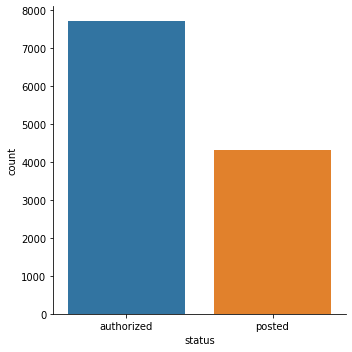

In [85]:
sns.catplot(data=df, x='status', kind='count')

In [86]:
df['card_present_flag'].unique()

array([ 1.,  0., nan])

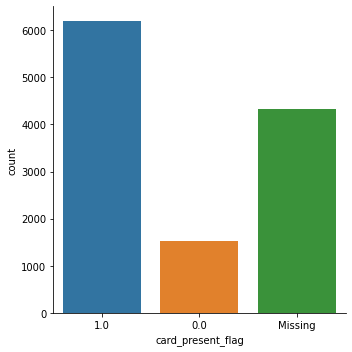

In [87]:
df_card_present_1 = df[['card_present_flag']].copy().fillna("Missing")
sns.catplot(data=df_card_present_1, x='card_present_flag', kind='count')

In [88]:
df['bpay_biller_code'].unique()

array([nan, 0, ' THE DISCOUNT CHEMIST GROUP',
       ' LAND WATER & PLANNING East Melbourne'], dtype=object)

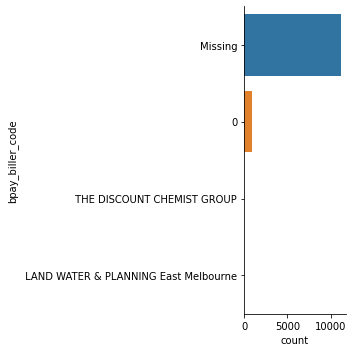

In [89]:
df_bpay_biller_1 = df[['bpay_biller_code']].copy().fillna("Missing")
sns.catplot(data=df_bpay_biller_1, y='bpay_biller_code', kind='count')

In [90]:
df['account'].nunique()

100

In [91]:
df_account_values = df['account'].value_counts()
df_account_values = df_account_values.reset_index()
df_account_values.columns = ['account', 'values_count']
df_account_values.head()


,account,values_count
0,ACC-1598451071,578
1,ACC-1222300524,303
2,ACC-182446574,292
3,ACC-4258502723,260
4,ACC-1037050564,259


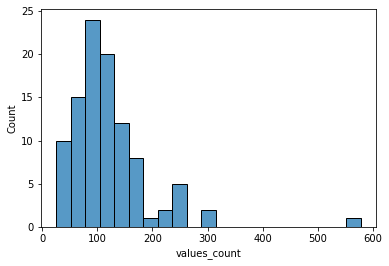

In [92]:
sns.histplot(data=df_account_values, x='values_count')

In [93]:
df['currency'].unique()

array(['AUD'], dtype=object)

In [94]:
df['long_lat'].nunique()

100

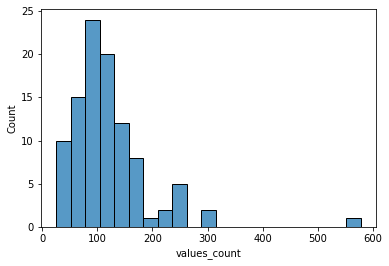

In [95]:
df_long_lat_values = df['long_lat'].value_counts()
df_long_lat_values = df_long_lat_values.reset_index()
df_long_lat_values.columns = ['long_lat', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_long_lat_values, x='values_count')


In [96]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

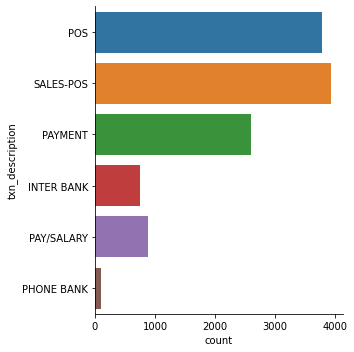

In [97]:
sns.catplot(data=df, y='txn_description', kind='count')

In [98]:
df['merchant_id'].nunique()

5725

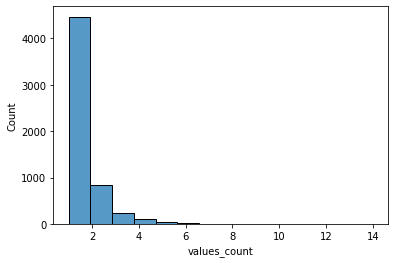

In [99]:
df_merch_id_values = df['merchant_id'].value_counts()
df_merch_id_values = df_merch_id_values.reset_index()
df_merch_id_values.columns = ['long_lat', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_merch_id_values, x='values_count')

In [100]:
df['merchant_code'].unique()

array([nan,  0.])

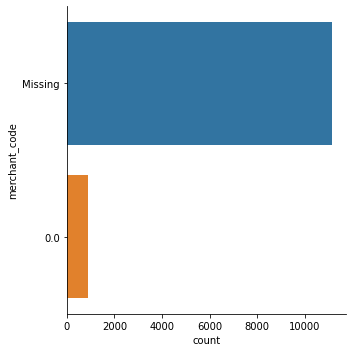

In [101]:
df_merch_code = df[['merchant_code']].copy().fillna("Missing")
sns.catplot(data=df_merch_code, y='merchant_code', kind='count')

In [102]:
df['first_name'].nunique()

80

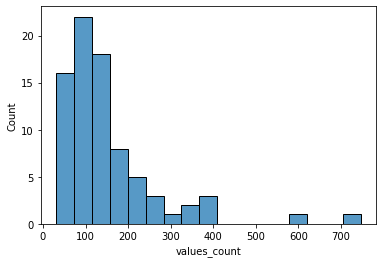

In [103]:
df_fname_values = df['first_name'].value_counts()
df_fname_values = df_fname_values.reset_index()
df_fname_values.columns = ['first_name', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_fname_values, x='values_count')

In [104]:
df['balance'].nunique()

12006

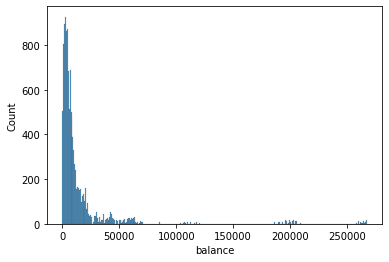

In [105]:
sns.histplot(data=df, x='balance')

In [106]:
df['date'].nunique()

91

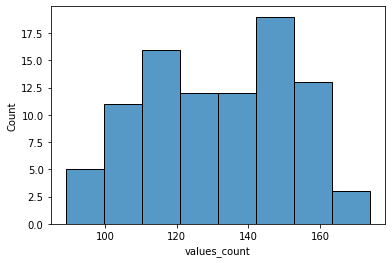

In [107]:
df_date_values = df['date'].value_counts()
df_date_values = df_date_values.reset_index()
df_date_values.columns = ['date', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_date_values, x='values_count')

In [108]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

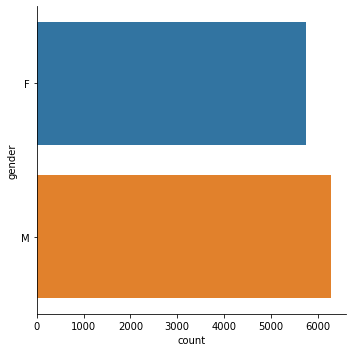

In [109]:
sns.catplot(data=df, y='gender', kind='count')

In [110]:
df['age'].nunique()

33

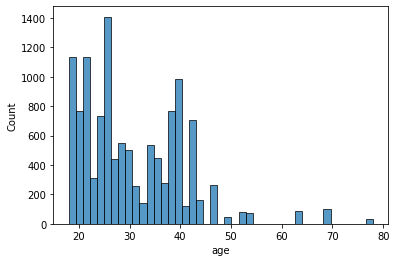

In [111]:
sns.histplot(data=df, x='age')

In [112]:
df['merchant_suburb'].nunique()

1609

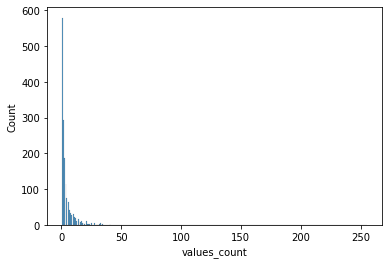

In [113]:
df_merchant_suburb_values = df['merchant_suburb'].value_counts()
df_merchant_suburb_values = df_merchant_suburb_values.reset_index()
df_merchant_suburb_values.columns = ['merchant_suburb', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_merchant_suburb_values, x='values_count')


In [114]:
df_merchant_suburb_values.max()

merchant_suburb    Zuccoli
values_count           255
dtype: object

In [115]:
df['merchant_state'].unique()

array(['QLD', 'NSW', nan, 'VIC', 'WA', 'SA', 'NT', 'TAS', 'ACT'],
      dtype=object)

In [116]:
df['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

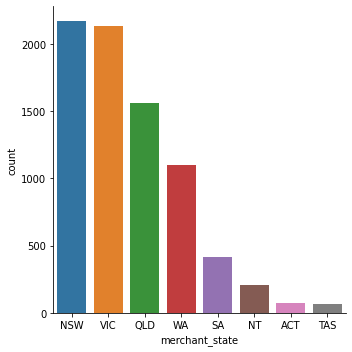

In [143]:
sns.catplot(data=df, x='merchant_state', kind='count', order=df['merchant_state'].value_counts().index)

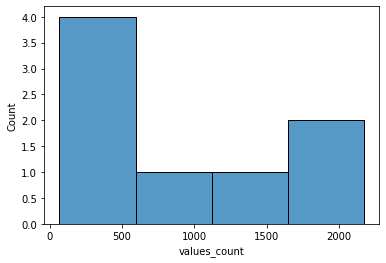

In [117]:
df_merchant_state_values = df['merchant_state'].value_counts()
df_merchant_state_values = df_merchant_state_values.reset_index()
df_merchant_state_values.columns = ['merchant_state', 'values_count']
# df_long_lat_values.head()
sns.histplot(data=df_merchant_state_values, x='values_count')


In [118]:
df['extraction'].nunique()

9442

In [130]:
df['extraction_year'].value_counts()

2018    12043
Name: extraction_year, dtype: int64

In [140]:
df['extraction_month_name'].value_counts()
# sns.catplot(data=df, y='extraction_month_name', kind='count')

October      4087
September    4013
August       3943
Name: extraction_month_name, dtype: int64

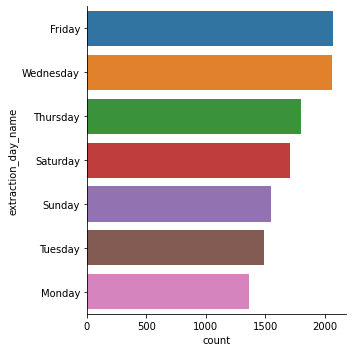

In [142]:
# df['extraction_day_name'].value_counts()
sns.catplot(data=df, y='extraction_day_name', kind='count', order=df['extraction_day_name'].value_counts().index)

In [119]:
df['amount'].nunique()

4457

In [120]:
df['transaction_id'].nunique()

12043

In [121]:
df['country'].unique()

array(['Australia'], dtype=object)

In [122]:
df['customer_id'].nunique()

100

In [123]:
df['merchant_long_lat'].nunique()

2703

In [124]:
df['movement'].unique()

array(['debit', 'credit'], dtype=object)